In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
euro_data = pd.read_csv('euro_data.csv')
euro_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [31]:
euro_data.year.value_counts()

7    4297
6    4297
Name: year, dtype: int64

In [32]:
# Do people become less trusting from 2012 to 2014?
ch_cntry = euro_data[euro_data['cntry'] == 'CH']
es_cntry = euro_data[euro_data['cntry'] == 'ES']
se_cntry = euro_data[euro_data['cntry'] == 'SE']
no_cntry = euro_data[euro_data['cntry'] == 'NO']
cz_cntry = euro_data[euro_data['cntry'] == 'CZ']
de_cntry = euro_data[euro_data['cntry'] == 'DE']

ch_cntry_2012 = ch_cntry[ch_cntry['year'] == 6]
ch_cntry_2014 = ch_cntry[ch_cntry['year'] == 7]

es_cntry_2012 = es_cntry[es_cntry['year'] == 6]
es_cntry_2014 = es_cntry[es_cntry['year'] == 7]

se_cntry_2012 = se_cntry[se_cntry['year'] == 6]
se_cntry_2014 = se_cntry[se_cntry['year'] == 7]

no_cntry_2012 = no_cntry[no_cntry['year'] == 6]
no_cntry_2014 = no_cntry[no_cntry['year'] == 7]

cz_cntry_2012 = cz_cntry[cz_cntry['year'] == 6]
cz_cntry_2014 = cz_cntry[cz_cntry['year'] == 7]

de_cntry_2012 = de_cntry[de_cntry['year'] == 6]
de_cntry_2014 = de_cntry[de_cntry['year'] == 7]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1195bde48>,
      dtype=object)

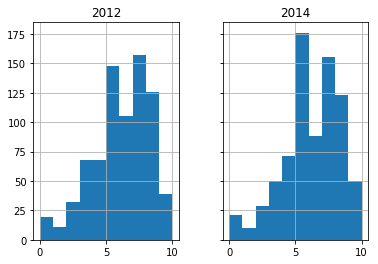

In [42]:
ch_trust_2012 = np.asarray(ch_cntry_2012['ppltrst'])
ch_trust_2014 = np.asarray(ch_cntry_2014['ppltrst'])

ch_trust = pd.DataFrame()
ch_trust['2012'] = ch_trust_2012
ch_trust['2014'] = ch_trust_2014

ch_trust.hist(sharex=True, sharey=True)

2012    5.677878
2014    5.751617
dtype: float64


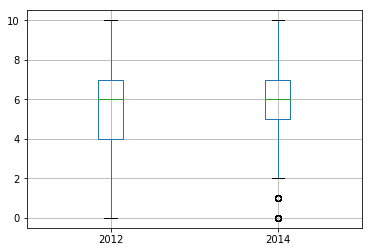

In [54]:
print(ch_trust.mean())
ch_trust.boxplot()
plt.show()

In [61]:
# p > .05 leads us to believe that this cntry has not lost trust between 2012 and 2014
print(stats.wilcoxon(ch_trust['2012'], ch_trust['2014']))
print(stats.ttest_rel(ch_trust['2012'], ch_trust['2014']))
print(stats.ttest_ind(ch_trust['2012'], ch_trust['2014']))

WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)


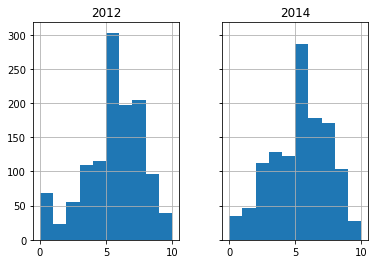

2012    5.112304
2014    4.895128
dtype: float64


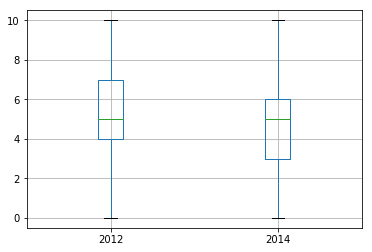

Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725321856)
Ttest_indResult(statistic=2.466707368355955, pvalue=0.013704982855186969)


In [72]:
# This country IS less trusting
es_trust_2012 = np.asarray(es_cntry_2012['ppltrst'])
es_trust_2014 = np.asarray(es_cntry_2014['ppltrst'])

es_trust = pd.DataFrame()
es_trust['2012'] = es_trust_2012
es_trust['2014'] = es_trust_2014
es_trust = es_trust.dropna()

es_trust.hist(sharex=True, sharey=True)
plt.show()

print(es_trust.mean())
es_trust.boxplot()
plt.show()

print(stats.ttest_rel(es_trust['2012'], es_trust['2014']))
print(stats.ttest_ind(es_trust['2012'], es_trust['2014']))

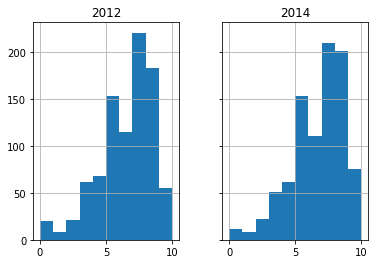

2012    6.058499
2014    6.257174
dtype: float64


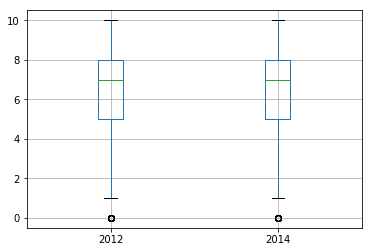

Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.0390078167095776)
Ttest_indResult(statistic=-2.081901903019313, pvalue=0.03749162208243697)


In [74]:
# This country is MORE trusting
se_trust_2012 = np.asarray(se_cntry_2012['ppltrst'])
se_trust_2014 = np.asarray(se_cntry_2014['ppltrst'])

se_trust = pd.DataFrame()
se_trust['2012'] = se_trust_2012
se_trust['2014'] = se_trust_2014
se_trust = se_trust.dropna()

se_trust.hist(sharex=True, sharey=True)
plt.show()

print(se_trust.mean())
se_trust.boxplot()
plt.show()

print(stats.ttest_rel(se_trust['2012'], se_trust['2014']))
print(stats.ttest_ind(se_trust['2012'], se_trust['2014']))

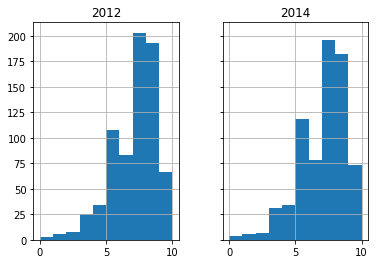

2012    6.647462
2014    6.599451
dtype: float64


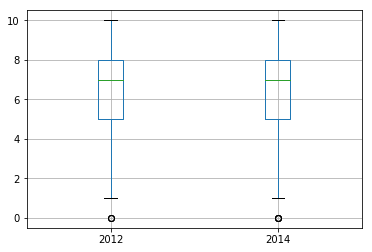

Ttest_relResult(statistic=0.5073077081124404, pvalue=0.6120925701518767)
Ttest_indResult(statistic=0.5144953142552611, pvalue=0.6069838196942174)


In [75]:
# This country is neither more nor less trusting
no_trust_2012 = np.asarray(no_cntry_2012['ppltrst'])
no_trust_2014 = np.asarray(no_cntry_2014['ppltrst'])

no_trust = pd.DataFrame()
no_trust['2012'] = no_trust_2012
no_trust['2014'] = no_trust_2014
no_trust = no_trust.dropna()

no_trust.hist(sharex=True, sharey=True)
plt.show()

print(no_trust.mean())
no_trust.boxplot()
plt.show()

print(stats.ttest_rel(no_trust['2012'], no_trust['2014']))
print(stats.ttest_ind(no_trust['2012'], no_trust['2014']))

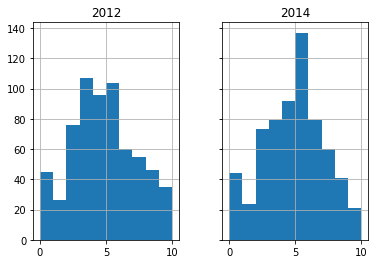

2012    4.361538
2014    4.429231
dtype: float64


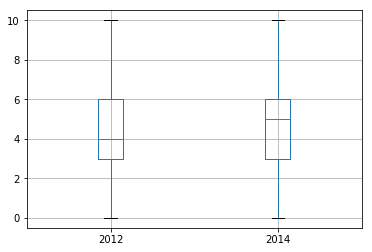

Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.6171292682404208)
Ttest_indResult(statistic=-0.5178840749623017, pvalue=0.6046274077331995)


In [76]:
# This country is neither more nor less trusting
cz_trust_2012 = np.asarray(cz_cntry_2012['ppltrst'])
cz_trust_2014 = np.asarray(cz_cntry_2014['ppltrst'])

cz_trust = pd.DataFrame()
cz_trust['2012'] = cz_trust_2012
cz_trust['2014'] = cz_trust_2014
cz_trust = cz_trust.dropna()

cz_trust.hist(sharex=True, sharey=True)
plt.show()

print(cz_trust.mean())
cz_trust.boxplot()
plt.show()

print(stats.ttest_rel(cz_trust['2012'], cz_trust['2014']))
print(stats.ttest_ind(cz_trust['2012'], cz_trust['2014']))

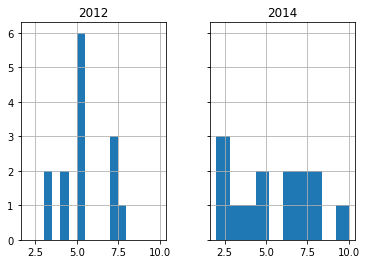

2012    5.214286
2014    5.357143
dtype: float64


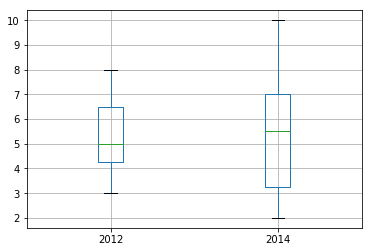

Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)


In [77]:
# Cannot determine whether people are more or less trusting.
de_trust_2012 = np.asarray(de_cntry_2012['ppltrst'])
de_trust_2014 = np.asarray(de_cntry_2014['ppltrst'])

de_trust = pd.DataFrame()
de_trust['2012'] = de_trust_2012
de_trust['2014'] = de_trust_2014
de_trust = de_trust.dropna()

de_trust.hist(sharex=True, sharey=True)
plt.show()

print(de_trust.mean())
de_trust.boxplot()
plt.show()

print(stats.ttest_rel(de_trust['2012'], de_trust['2014']))
print(stats.ttest_ind(de_trust['2012'], de_trust['2014']))

## Did People Become Happier? ##

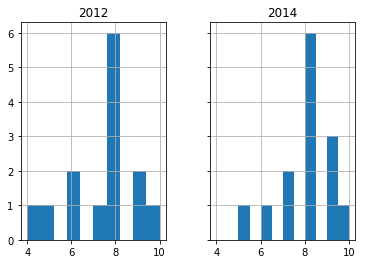

2012    7.428571
2014    7.857143
dtype: float64


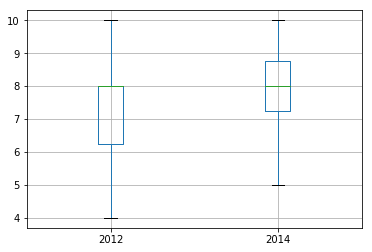

Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)
Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.451246041120838)


In [80]:
# Cannot determine if the pop is happier now vs then.
de_happy_2012 = np.asarray(de_cntry_2012['happy'])
de_happy_2014 = np.asarray(de_cntry_2014['happy'])

de_happy = pd.DataFrame()
de_happy['2012'] = de_happy_2012
de_happy['2014'] = de_happy_2014
de_happy = de_happy.dropna()

de_happy.hist(sharex=True, sharey=True)
plt.show()

print(de_happy.mean())
de_happy.boxplot()
plt.show()

print(stats.ttest_rel(de_happy['2012'], de_happy['2014']))
print(stats.ttest_ind(de_happy['2012'], de_happy['2014']))

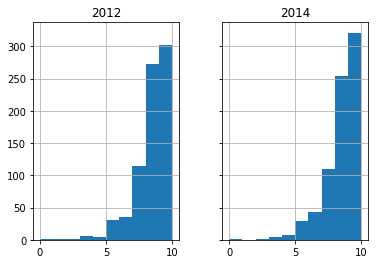

2012    8.088312
2014    8.111688
dtype: float64


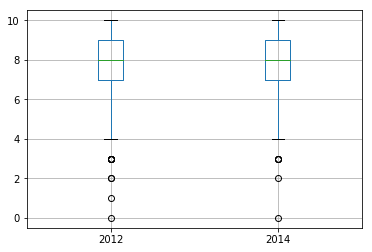

MannwhitneyuResult(statistic=293121.0, pvalue=0.3467707376324811)
WilcoxonResult(statistic=92816.5, pvalue=0.989517215264762)
Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355428359)
Ttest_indResult(statistic=-0.32253950576111284, pvalue=0.7470878531125811)


In [83]:
# Cannot determine if happiness is different
ch_happy_2012 = np.asarray(ch_cntry_2012['happy'])
ch_happy_2014 = np.asarray(ch_cntry_2014['happy'])

ch_happy = pd.DataFrame()
ch_happy['2012'] = ch_happy_2012
ch_happy['2014'] = ch_happy_2014
ch_happy = ch_happy.dropna()

ch_happy.hist(sharex=True, sharey=True)
plt.show()

print(ch_happy.mean())
ch_happy.boxplot()
plt.show()

print(stats.mannwhitneyu(ch_happy['2012'], ch_happy['2014']))
print(stats.wilcoxon(ch_happy['2012'], ch_happy['2014']))
print(stats.ttest_rel(ch_happy['2012'], ch_happy['2014']))
print(stats.ttest_ind(ch_happy['2012'], ch_happy['2014']))

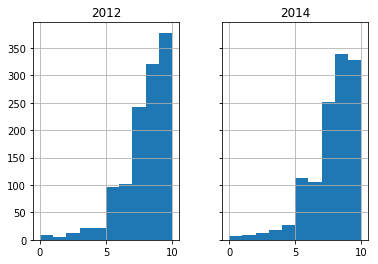

2012    7.547481
2014    7.420314
dtype: float64


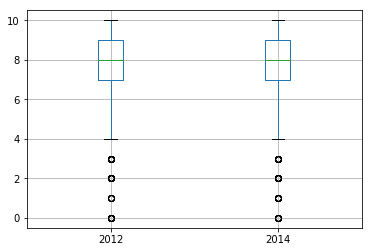

KruskalResult(statistic=3.9620118510103475, pvalue=0.046538051258145516)
MannwhitneyuResult(statistic=699634.0, pvalue=0.02327065428424168)
WilcoxonResult(statistic=231958.5, pvalue=0.06262681782599841)
Ttest_relResult(statistic=1.613832417735418, pvalue=0.1068245155648069)
Ttest_indResult(statistic=1.652740188730567, pvalue=0.09851346772544292)


In [85]:
es_happy_2012 = np.asarray(es_cntry_2012['happy'])
es_happy_2014 = np.asarray(es_cntry_2014['happy'])

es_happy = pd.DataFrame()
es_happy['2012'] = es_happy_2012
es_happy['2014'] = es_happy_2014
es_happy = es_happy.dropna()

es_happy.hist(sharex=True, sharey=True)
plt.show()

print(es_happy.mean())
es_happy.boxplot()
plt.show()

print(stats.kruskal(es_happy['2012'], es_happy['2014']))
print(stats.mannwhitneyu(es_happy['2012'], es_happy['2014']))
print(stats.wilcoxon(es_happy['2012'], es_happy['2014']))
print(stats.ttest_rel(es_happy['2012'], es_happy['2014']))
print(stats.ttest_ind(es_happy['2012'], es_happy['2014']))

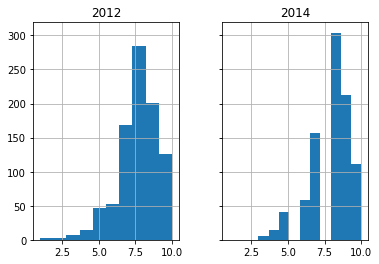

2012    7.909292
2014    7.948009
dtype: float64


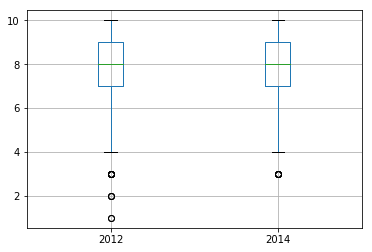

Ttest_relResult(statistic=-0.5581637086030012, pvalue=0.5768709591234161)
Ttest_indResult(statistic=-0.561354734607406, pvalue=0.5746253816522227)


In [87]:
# Cannot determine
se_happy_2012 = np.asarray(se_cntry_2012['happy'])
se_happy_2014 = np.asarray(se_cntry_2014['happy'])

se_happy = pd.DataFrame()
se_happy['2012'] = se_happy_2012
se_happy['2014'] = se_happy_2014
se_happy = se_happy.dropna()

se_happy.hist(sharex=True, sharey=True)
plt.show()

print(se_happy.mean())
se_happy.boxplot()
plt.show()


print(stats.ttest_rel(se_happy['2012'], se_happy['2014']))
print(stats.ttest_ind(se_happy['2012'], se_happy['2014']))

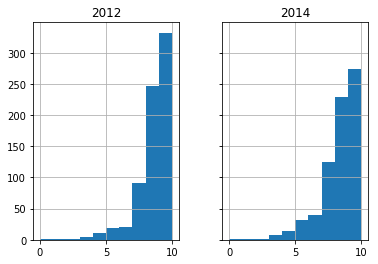

2012    8.251719
2014    7.911967
dtype: float64


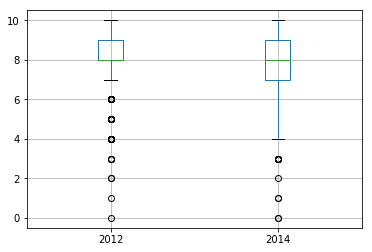

Ttest_relResult(statistic=4.2856826576235925, pvalue=2.0674530134057013e-05)
Ttest_indResult(statistic=4.3024342447847435, pvalue=1.8022576278185143e-05)


In [88]:
# People here are less happy now
no_happy_2012 = np.asarray(no_cntry_2012['happy'])
no_happy_2014 = np.asarray(no_cntry_2014['happy'])

no_happy = pd.DataFrame()
no_happy['2012'] = no_happy_2012
no_happy['2014'] = no_happy_2014
no_happy = no_happy.dropna()

no_happy.hist(sharex=True, sharey=True)
plt.show()

print(no_happy.mean())
no_happy.boxplot()
plt.show()


print(stats.ttest_rel(no_happy['2012'], no_happy['2014']))
print(stats.ttest_ind(no_happy['2012'], no_happy['2014']))

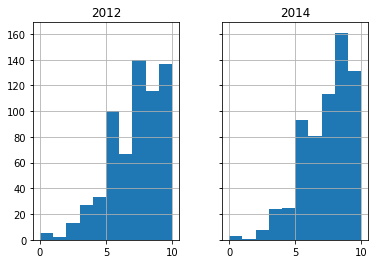

2012    6.767188
2014    6.929688
dtype: float64


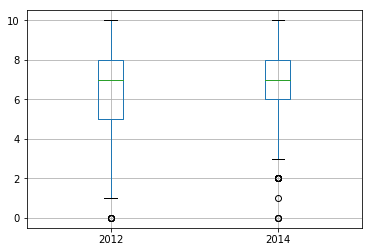

KruskalResult(statistic=1.854115866194704, pvalue=0.17330545259186408)
MannwhitneyuResult(statistic=195915.0, pvalue=0.08666482385036761)
WilcoxonResult(statistic=73213.0, pvalue=0.18319351815338547)
Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.14584548433894534)
Ttest_indResult(statistic=-1.4675579377483174, pvalue=0.14247038847484955)


In [91]:
# Cannot determine
cz_happy_2012 = np.asarray(cz_cntry_2012['happy'])
cz_happy_2014 = np.asarray(cz_cntry_2014['happy'])

cz_happy = pd.DataFrame()
cz_happy['2012'] = cz_happy_2012
cz_happy['2014'] = cz_happy_2014
cz_happy = cz_happy.dropna()

cz_happy.hist(sharex=True, sharey=True)
plt.show()

print(cz_happy.mean())
cz_happy.boxplot()
plt.show()


print(stats.kruskal(cz_happy['2012'], cz_happy['2014']))
print(stats.mannwhitneyu(cz_happy['2012'], cz_happy['2014']))
print(stats.wilcoxon(cz_happy['2012'], cz_happy['2014']))
print(stats.ttest_rel(cz_happy['2012'], cz_happy['2014']))
print(stats.ttest_ind(cz_happy['2012'], cz_happy['2014']))

## Who reported watching more TV in 2012, men or women? ##

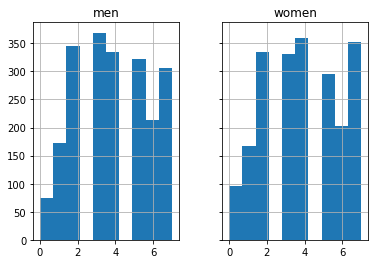

men      3.903135
women    3.941039
dtype: float64


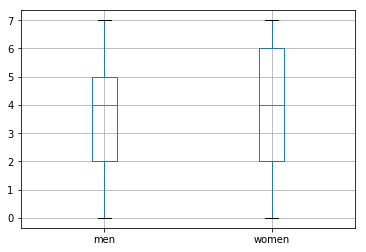

Ttest_indResult(statistic=-0.6145249032716732, pvalue=0.5389012486909366)


In [136]:
# Women but cannot determine if representative of population
male_cntry = euro_data[euro_data['gndr'] == 1]
male_cntry = male_cntry[male_cntry['year'] == 6]
female_cntry = euro_data[euro_data['gndr'] == 2]
female_cntry = female_cntry[female_cntry['year'] == 6]

male_tv = np.asarray(male_cntry['tvtot'])
female_tv = np.asarray(female_cntry['tvtot'])

tv_time = pd.DataFrame()
tv_time['men'] = pd.Series(male_tv)
tv_time['women'] = pd.Series(female_tv)
tv_time = tv_time.dropna()

tv_time.hist(sharex=True, sharey=True)
plt.show()

print(tv_time.mean())
tv_time.boxplot()
plt.show()

print(stats.ttest_ind(tv_time['men'], tv_time['women']))

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone? ##

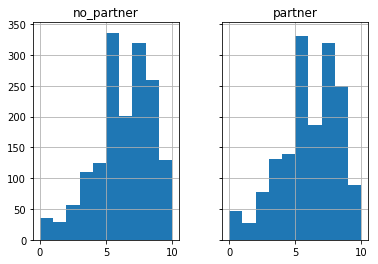

partner       5.612258
no_partner    5.856160
dtype: float64


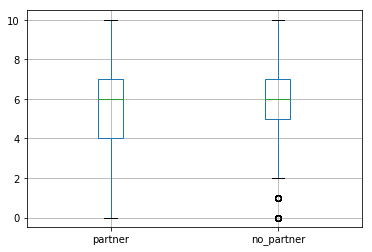

Ttest_indResult(statistic=-3.14986585141805, pvalue=0.0016485388386302887)


In [138]:
# People not living with a partner are more likely to believe people were fair in 2012
partner = euro_data[euro_data['partner'] == 1]
partner = partner[partner['year'] == 6]
no_partner = euro_data[euro_data['partner'] == 2]
no_partner = no_partner[no_partner['year'] == 6]

partner_fair = np.asarray(partner['pplfair'])
no_partner_fair = np.asarray(no_partner['pplfair'])

fair = pd.DataFrame()
fair['partner'] = pd.Series(partner_fair)
fair['no_partner'] = pd.Series(no_partner_fair)
fair = fair.dropna()

fair.hist(sharex=True, sharey=True)
plt.show()

print(fair.mean())
fair.boxplot()
plt.show()

print(stats.ttest_ind(fair['partner'], fair['no_partner']))

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out? ##

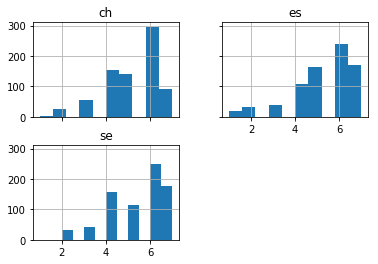

ch    5.158442
es    5.293506
se    5.345455
dtype: float64


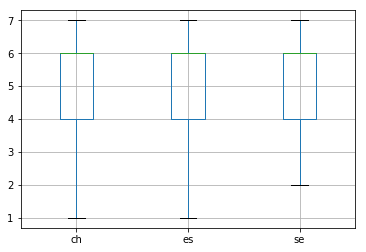

F_onewayResult(statistic=3.6915306699287345, pvalue=0.025081211367408224)
Ttest_indResult(statistic=-1.8936482932662528, pvalue=0.05845922937788295)
Ttest_indResult(statistic=-0.7104567825457939, pvalue=0.477528634452851)
Ttest_indResult(statistic=-2.7240655821960287, pvalue=0.006521357492977966)


In [147]:
# They are statistically different with the main difference countries CH and SE
ch_cntry = euro_data[euro_data['cntry'] == 'CH']
ch_cntry = ch_cntry[ch_cntry['year'] == 7]

es_cntry = euro_data[euro_data['cntry'] == 'ES']
es_cntry = es_cntry[es_cntry['year'] == 7]

se_cntry = euro_data[euro_data['cntry'] == 'SE']
se_cntry = se_cntry[se_cntry['year'] == 7]

ch_meet = np.asarray(ch_cntry['sclmeet'])
es_meet = np.asarray(es_cntry['sclmeet'])
se_meet = np.asarray(se_cntry['sclmeet'])

meet = pd.DataFrame()
meet['ch'] = pd.Series(ch_meet)
meet['es'] = pd.Series(es_meet)
meet['se'] = pd.Series(se_meet)
meet = meet.dropna()

meet.hist(sharex=True, sharey=True)
plt.show()

print(meet.mean())
meet.boxplot()
plt.show()

print(stats.f_oneway(meet['ch'], meet['es'], meet['se']))

print(stats.ttest_ind(meet['ch'], meet['es']))
print(stats.ttest_ind(meet['es'], meet['se']))
print(stats.ttest_ind(meet['ch'], meet['se']))

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out? ##


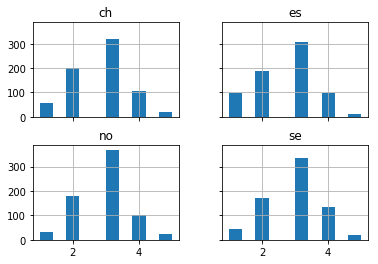

ch    2.770213
es    2.619858
se    2.879433
no    2.859574
dtype: float64


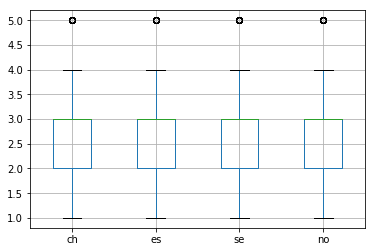

F_onewayResult(statistic=12.363941816962456, pvalue=4.935265143710779e-08)
Ttest_indResult(statistic=3.0414856599020363, pvalue=0.0023976411822137235)
Ttest_indResult(statistic=-5.3442630248925616, pvalue=1.0577504486118713e-07)
Ttest_indResult(statistic=-2.2874424751941396, pvalue=0.022317754393859877)
Ttest_indResult(statistic=-1.921126630937436, pvalue=0.0549174585853139)
Ttest_indResult(statistic=0.43552350347600965, pvalue=0.6632492379410151)
Ttest_indResult(statistic=-5.0616021187729086, pvalue=4.706476173344463e-07)


In [153]:
ch_cntry = euro_data[euro_data['cntry'] == 'CH']
ch_cntry = ch_cntry[ch_cntry['year'] == 7]

es_cntry = euro_data[euro_data['cntry'] == 'ES']
es_cntry = es_cntry[es_cntry['year'] == 7]

se_cntry = euro_data[euro_data['cntry'] == 'SE']
se_cntry = se_cntry[se_cntry['year'] == 7]

no_cntry = euro_data[euro_data['cntry'] == 'NO']
no_cntry = no_cntry[no_cntry['year'] == 7]

ch_social = np.asarray(ch_cntry['sclact'])
es_social = np.asarray(es_cntry['sclact'])
se_social = np.asarray(se_cntry['sclact'])
no_social = np.asarray(no_cntry['sclact'])

social = pd.DataFrame()
social['ch'] = pd.Series(ch_social)
social['es'] = pd.Series(es_social)
social['se'] = pd.Series(se_social)
social['no'] = pd.Series(no_social)
social = social.dropna()

social.hist(sharex=True, sharey=True)
plt.show()

print(social.mean())
social.boxplot()
plt.show()

print(stats.f_oneway(social['ch'], social['es'], social['se'], social['no']))

print(stats.ttest_ind(social['ch'], social['es']))
print(stats.ttest_ind(social['es'], social['se']))
print(stats.ttest_ind(social['ch'], social['se']))
print(stats.ttest_ind(social['ch'], social['no']))
print(stats.ttest_ind(social['se'], social['no']))
print(stats.ttest_ind(social['es'], social['no']))